# Importing the important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Data 

In [93]:
df = pd.read_csv('Used_Bikes.csv')

## Exploratory Data Analysis and Visualization

In [3]:
df.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [4]:
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [5]:
df.shape

(32648, 8)

In [39]:
df.nunique()

bike_name      471
price         1232
city           443
kms_driven    3722
owner            4
age             35
power           53
brand           23
dtype: int64

In [40]:
power_vals = df.power.unique()
power_vals.sort()
power_vals

array([ 100.,  107.,  110.,  125.,  135.,  149.,  150.,  160.,  175.,
        180.,  200.,  220.,  223.,  250.,  295.,  300.,  302.,  310.,
        320.,  350.,  390.,  400.,  410.,  500.,  502.,  535.,  600.,
        650.,  675.,  750.,  765.,  796.,  797.,  800.,  821.,  850.,
        865.,  883.,  899.,  900.,  959., 1000., 1050., 1090., 1100.,
       1130., 1198., 1200., 1262., 1299., 1300., 1700., 1800.])

/usr/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='owner', ylabel='count'>

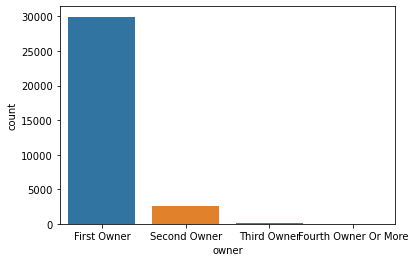

In [6]:
sns.countplot(df.owner)

<AxesSubplot:>

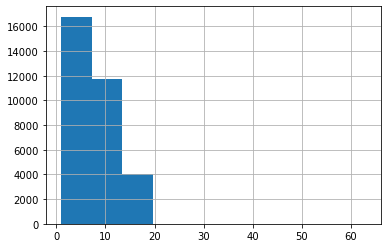

In [7]:
df.age.hist()

<AxesSubplot:>

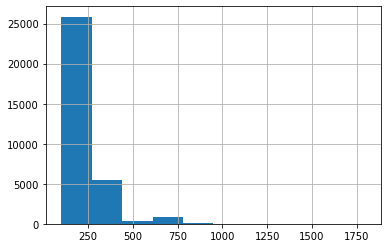

In [8]:
df.power.hist()

<AxesSubplot:>

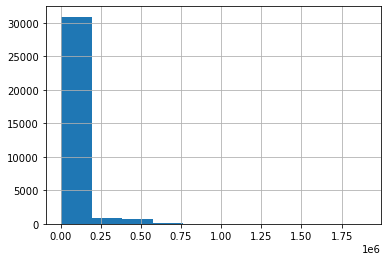

In [9]:
df.price.hist()

(array([1., 0., 1., 1., 0., 0., 2., 3., 1., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
        1200, 1300, 1400, 1500, 1600, 1700, 1800]),
 <BarContainer object of 17 artists>)

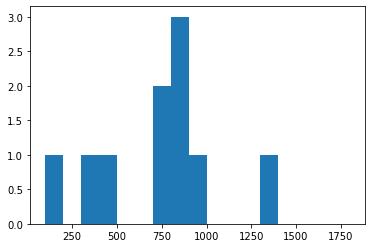

In [12]:
plt.hist(x=df.power.groupby(by=df.power).count(), bins=range(int(power_vals.min()), int(power_vals.max()+100),100))

In [13]:
df.corr()

,price,kms_driven,age,power
price,1.000000,-0.313955,-0.399133,0.862376
kms_driven,-0.313955,1.000000,0.484684,-0.264016
age,-0.399133,0.484684,1.000000,-0.337035
power,0.862376,-0.264016,-0.337035,1.000000


<AxesSubplot:>

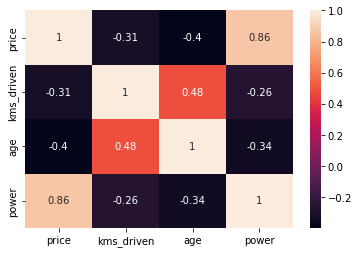

In [14]:
sns.heatmap(data=df.corr(), annot=True)

<AxesSubplot:xlabel='kms_driven', ylabel='price'>

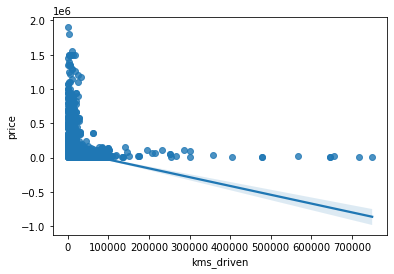

In [15]:
sns.regplot(x='kms_driven', y='price', data=df)

<AxesSubplot:xlabel='age', ylabel='price'>

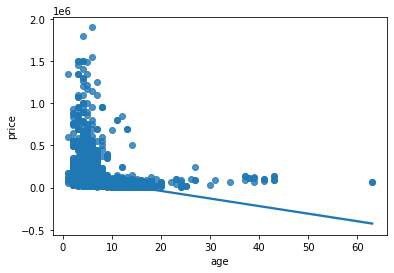

In [16]:
sns.regplot(x='age', y='price', data=df)

<AxesSubplot:xlabel='power', ylabel='price'>

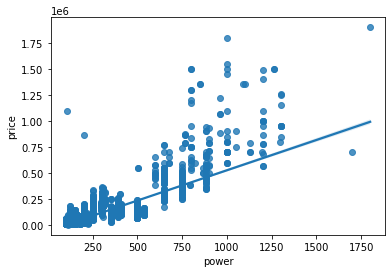

In [17]:
sns.regplot(x='power', y='price', data=df)

# Modelling

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
x = df[['bike_name', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand']]
y = df['price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [20]:
preproc = ColumnTransformer([('numeric',Pipeline([('scaling', MinMaxScaler())]),['kms_driven', 'age', 'power']),
                    ('label',Pipeline([('label',OneHotEncoder(handle_unknown='ignore'))]),
                     ['bike_name', 'city', 'owner', 'brand'])
                  ])testDF = pd.DataFrame(data = , columns=TestKms

In [21]:
pipe = Pipeline([ ('preproc', preproc), ('model', RandomForestRegressor()) ])

In [22]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['kms_driven', 'age',
                                                   'power']),
                                                 ('label',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['bike_name', 'city', 'owner',
                                                   'brand'])])),
                ('model', RandomForestRegressor())])

In [23]:
pipe.get_params()

{'memory': None,
 'steps': [('preproc',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('scaling', MinMaxScaler())]),
                                    ['kms_driven', 'age', 'power']),
                                   ('label',
                                    Pipeline(steps=[('label',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['bike_name', 'city', 'owner', 'brand'])])),
  ('model', RandomForestRegressor())],
 'verbose': False,
 'preproc': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('scaling', MinMaxScaler())]),
                                  ['kms_driven', 'age', 'power']),
                                 ('label',
                                  Pipeline(steps=[('label',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                  

## Testing

In [24]:
ypred = pipe.predict(xtest)

In [25]:
pipe.score(xtest, ytest)

0.9515066865206471

## Compairision against Linear Regression 

In [29]:
from sklearn.linear_model import LinearRegression

In [33]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [30]:
x = df[['kms_driven', 'owner', 'age', 'power',
       'brand']]
y = df['price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [31]:
linReg = LinearRegression()

In [34]:
preproc = ColumnTransformer([('numeric',Pipeline([('scaling', MinMaxScaler())]),['kms_driven', 'age', 'power']),
                    ('label',Pipeline([('label',OneHotEncoder(handle_unknown='ignore'))]),
                     ['bike_name', 'city', 'owner', 'brand'])
                  ])

In [35]:
pipe = Pipeline([ ('preproc', preproc), ('model', RandomForestRegressor()) ])

In [36]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['kms_driven', 'age',
                                                   'power']),
                                                 ('label',
                                                  Pipeline(steps=[('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['bike_name', 'city', 'owner',
                                                   'brand'])])),
                ('model', RandomForestRegressor())])

In [37]:
ypred = pipe.predict(xtest)

In [38]:
pipe.score(xtest, ytest)

0.9388312215099952